<a href="https://colab.research.google.com/github/MadhurJain06/AIML5/blob/main/ai_assignments/linearRegression/ml_regression_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: California Housing, samples=20640, features=8
RMSE=0.746, MAE=0.533
Saved: true_vs_pred.png, model_card.json


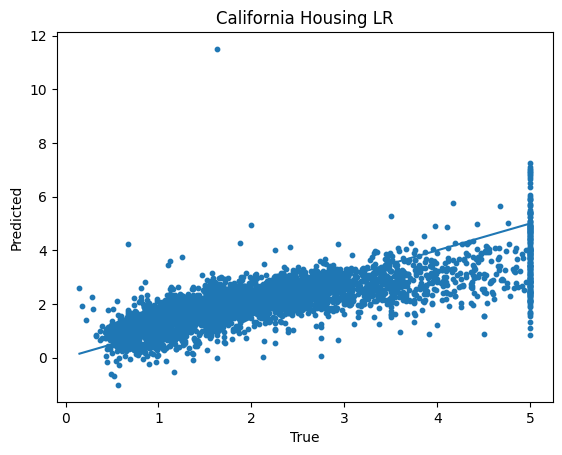

In [1]:
import json
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

try:
    ds=fetch_california_housing(as_frame=True)
    X=ds.data; y=ds.target; name="California Housing"
except Exception:
    ds=load_diabetes(as_frame=True)
    X=ds.data; y=ds.target; name="Diabetes"

print(f"Dataset: {name}, samples={len(X)}, features={len(X.columns)}")

Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler(); Xtr_s=sc.fit_transform(Xtr); Xte_s=sc.transform(Xte)
model=LinearRegression(); model.fit(Xtr_s,ytr)
pred=model.predict(Xte_s)

rmse=np.sqrt(mean_squared_error(yte,pred))
mae=mean_absolute_error(yte,pred)
print(f"RMSE={rmse:.3f}, MAE={mae:.3f}")

plt.scatter(yte,pred,s=10); plt.plot([yte.min(),yte.max()],[yte.min(),yte.max()])
plt.xlabel("True"); plt.ylabel("Predicted"); plt.title(f"{name} LR")
plt.savefig("true_vs_pred.png")

card={"model":"LinearRegression","dataset":name,"RMSE":rmse,"MAE":mae}
json.dump(card,open("model_card.json","w"),indent=2)
print("Saved: true_vs_pred.png, model_card.json")
